In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/'My Drive'/programming/fast/digikala/q2

Mounted at /content/drive
/content/drive/My Drive/programming/fast/digikala/q2


In [3]:
pwd = %pwd
pwd

'/content/drive/My Drive/programming/fast/digikala/q2'

In [4]:
from fastai import *
from fastai.text import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [5]:
train = pd.read_csv('train_users.csv')
test = pd.read_csv('test_users.csv')

In [6]:
train.head(10)

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate
0,0,NaN,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,NaN,NaN,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خو...,NaN,NaN,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0
3,3,NaN,در کل خوب بود ولی متاسفانه درب محصول شکسته بود...,NaN,NaN,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حج...,ضدعفونی کننده سطوح,1,1,70.0
4,4,NaN,من که خیلی باهاش حال کردم فقط من که همیشه L می...,NaN,NaN,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0
5,5,خوب بود,خیلی قشنگ بود,"[""خیلی نرمه""]","[""نازکه""]",پتو پونته مدل Diyamond سایز 200 × 220 سانتی‌متر,پتو,1,1,100.0
6,6,NaN,از بقیه انواع صداگیر گوش که خریداری کردم این ب...,NaN,NaN,گوش گیر هاوارد لایت مدل BILSOM 303L بسته 5 جفتی,محافظ گوش,1,1,100.0
7,7,NaN,عالیه من که راضی بودم,NaN,NaN,اکسیدان مارال مدل CREAM شش درصدی حجم 1000 میلی...,اکسیدان,1,1,100.0
8,8,خوب,کیفیت و قیمت مناسب,"[""كيفيت خوب""]",NaN,شورت زنانه کوزا کد 02 مجموعه 3 عددی,شورت زنانه,1,1,80.0
9,9,ساده و زیبا و کاربردی,ساده .زیبا .کاربردی,NaN,NaN,جای عود طرح پر,سایر لوازم تزئینی,1,1,80.0


In [7]:
train_valid = pd.read_csv('train_users.csv').fillna('Nan')
test = pd.read_csv('test_users.csv').fillna('Nan')

In [8]:
data = TextList.from_df(df=train_valid,cols = ['title','comment','advantages','disadvantages','title_fa_product','title_fa_category'],path=pwd,)

In [9]:
data = data.split_by_rand_pct(0.15)

In [10]:
data= data.label_from_df('rate')

In [11]:
data = data.add_test(test)

In [12]:
data = data.databunch()
data

TextClasDataBunch;

Train: LabelList (224740 items)
x: TextList
xxbos xxmaj nan مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه xxmaj nan xxmaj nan ژل ضد عفونی کننده دست شون مدل xxmaj aloevera حجم 300 میلی لیتر ضدعفونی کننده,xxbos xxmaj redmi 8 با این مبلغ اگه امکانات و ارزش خرید واستون مهمه این گوشی عالیه و بیخودی پول برند نمیدی . [ " رم4 \ r","قیمت نسبت به سایر برندها \ r","طراحی و زیبایی \ r","باتری 5000 و فست شارژ \ r","صدای با حجم بالا و کیفیت مناسب \ r","حافظه داخلی 64 \ r","دوربین " ] [ " نداشتن هندزفری " ] گوشی موبایل شیائومی مدل xxmaj redmi 8 xxup m1908c3ig دو سیم‌ کارت ظرفیت 64 گیگابایت گوشی موبایل,xxbos عالی خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خوشحال شد لطفا در بسته بندی بیشتر توجه بشه xxmaj nan xxmaj nan ماسک کودک طرح سگ نگهبان مدل رابل ایفای نقش,xxbos xxmaj nan در کل خوب بود ولی متاسفانه درب محصول شکسته بود و مقداریش داخل بسته بندی خالی شده بود . xxmaj nan xxmaj nan مایع ضدعفونی کننده میوه و سبزیجات من مدل xxup wt حجم 500 میلی لیتر ضدعفونی کننده سطوح,xxbos xxmaj nan م

In [13]:
data.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
xxbos xxmaj nan اگر با آمریکا توافق بشه چی می‌شه ؟ \r \n \r \n ￼ \r \n \r \n آمریکا از ایران چه انتظاراتی داره ؟ امنیت xxunk ، کاهش xxunk نظامی ، دست کشیدن از xxunk نظامی در منطقه ، بیرون کشیدن xxunk از xxunk و عراق و یمن . \r \n \r \n ایران چه انتظاراتی از آمریکا داره ؟ برداشتن xxunk همه تحریم‌ها,20.0
xxbos سامسونگ اقا من بطور اتفاقی داشتم نظر کاربرها رو‌ می خوندم دیدم دوستان دارن با اپل مقایسه می کنند برند سامسونگ رو تور خدا الکی یه برند رو گنده نکنید اخه اصلا مقایسه اپل و سامسونگ عینه مقایسه مثلا بنز و هیوندا هست اپل کجا xxunk اولا که شما این رو در نظر بگیرید اپل اسم بزرگی همچون استیو xxunk پشتش هست که برای خیلیها همین اسم بسه .,60.0
xxbos فیلیمو باکس اندروید باکس فیلیمو را بایستی فیلیمو باکس با سیستم عامل اندروید تی وی xxunk ، چون این محصول فقط با سرویس تلویزیون xxunk فیلیمو کار می کند و امکان استفاده از اپلیکیشن های متفاوتی مانند نماوا ، تیوا و بسیاری از سرویس دهندگان تلویزیون xxunk را ندارد . از طرفی سیستم عامل اندروید تی وی بسیار محدود تر از سیستم عامل اندروید xxunk می باشد که بر,20.0
xxbos فوق العاده اس ! دو روز هست که این گوشی رو خریداری xxunk شگفت زده شدم ! ساخت ویتنام هست ! کیفیت قاب و حاشیه گوشی با اینکه پلاستیک هست ولی حس خیلی خوبی داره ! \r \n اندروید قابل ارتقا به 10 xxunk به عکاسی با موبایل علاقه دارین این گوشی xxunk برطرف میکنه و خارق العاده اس ! \r \n شارژ سریع 15 واتی داره,97.0
xxbos بهترین گوشی در این رنج قیمت گوشی خوبه \r \n نمی دونم چرا دوستان میگن بده \r \n من با اکراه خریدم چون پول زیادتر نداشتم سامسونگ xxup a51 بخرم و این رو بخاطر cpu قوی اش خریدم توی رنج قیمت خودش . \r \n همون روز اول باهاش کار کردم نظرم واقعا مثبت شد بهش به چند نفر معرفی کردم و دونفر از دوستانم هم,100.0


In [14]:
data.save(pwd + '/data_lm.pkl')

In [15]:
data = load_data(pwd, 'data_lm.pkl', bs=32)

In [16]:
learner = text_classifier_learner(data,AWD_LSTM,drop_mult=0.5).to_fp16()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


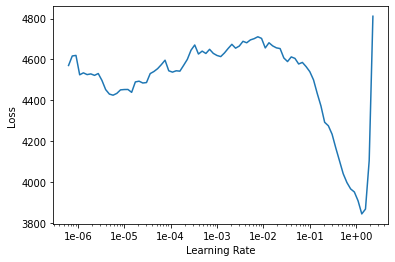

In [17]:
learner.lr_find()
learner.recorder.plot()

In [20]:
learner.fit_one_cycle(15,slice(3e-04,1e-01))

epoch,train_loss,valid_loss,time
0,1401.480469,1383.268188,02:58
1,1409.799927,1386.684448,03:06
2,1438.169312,1410.564453,03:03
3,1368.242310,1383.531006,03:04
4,1397.000000,1384.221924,02:55
5,1419.858154,1417.028198,03:05
6,1434.261108,1386.645386,03:07
7,1415.095215,1417.364990,02:58
8,1372.953369,1391.778809,03:02
9,1437.233032,1369.525146,02:56


In [21]:
learner.save(pwd +'/freezed')

In [ ]:
learner.load(pwd +'/freezed')

In [23]:
data.train_ds[2][1]

FloatItem 100.0

In [24]:
learner.predict(data.train_ds[2][0])

(FloatItem [55.9375], tensor([55.9375]), tensor([55.9375]))

In [25]:
preds = []
for i in tqdm(range(len(test['id']))):
    preds.append(learner.predict(data.test_ds[i][0])[1])

100%|██████████| 19399/19399 [1:03:03<00:00,  5.13it/s]


In [26]:
DF = pd.DataFrame()

In [27]:
DF['id'] = test['id']
DF['rate'] = preds

In [28]:
DF['rate'] = DF['rate'].apply(lambda x:int(x))

In [30]:
DF.to_csv(pwd + '/rates.csv')